# **SVM Classification**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import gdal
import numpy as np
from numpy import genfromtxt

In [ ]:
import os
os.chdir("/content/drive/MyDrive/AIA/final_dataset")

In [ ]:


TR=genfromtxt("/content/drive/MyDrive/AIA/final_dataset/training.csv",delimiter=",")
TR_X=TR[1:,1:9]
TR_Y=TR[1:,9]

In [ ]:
#TEST DATA 2020

data=gdal.Open("/content/drive/MyDrive/AIA/final_dataset/big_data_2020.tif")
dataArr=np.stack(data.ReadAsArray())

In [ ]:
#Reshape array
TestX2020=np.zeros((dataArr.shape[1],dataArr.shape[2],dataArr.shape[0]))
for i in range(dataArr.shape[1]):
    for j in range(dataArr.shape[2]):
       TestX2020[i,j,:] = dataArr[:, i, j]
TestX2020=np.reshape(TestX2020,(-1,8))

In [ ]:
del dataArr_gt

In [ ]:
data_gt=gdal.Open("/content/drive/MyDrive/AIA/final_dataset/cropland_align_2020_30m.tif")
dataArr_gt=np.stack(data_gt.ReadAsArray())
TestY2020=np.reshape(dataArr_gt,(-1,1))


In [ ]:
#Replace nan values with mean
import numpy.ma as ma
TR_X=np.where(np.isnan(TR_X), ma.array(TR_X, mask=np.isnan(TR_X)).mean(axis=0), TR_X)
TestX2020=np.where(np.isnan(TestX2020), ma.array(TestX2020, mask=np.isnan(TestX2020)).mean(axis=0), TestX2020)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=3.594, C=8.859)
model.fit(TR_X, TR_Y)
TestY2020predict= model.predict(TestX2020)
#supervised = y.reshape(rows, cols)

#io.imshow(palette[supervised])

In [ ]:
np.savetxt('/content/drive/MyDrive/AIA/final_dataset/ypred2020.csv', TestY2020predict, delimiter=',')

In [ ]:
from osgeo import gdal_array as gdarr
TestY2020predict=np.genfromtxt("ypred2020.csv",delimiter=",")

ypredict=np.reshape(TestY2020predict,(5606,7420))

In [ ]:
xoff = 0
yoff = 0
win_xsize = dataArr_gt.shape[0]
win_ysize = dataArr_gt.shape[1]


# create raster file
dst_ds = gdal.GetDriverByName('GTiff').Create('SVM2020.tif', win_ysize, win_xsize, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(data_gt.GetGeoTransform())    # specify coords
#srs = osr.SpatialReference(data_gt.GetProjectionRef)            # establish encoding
#srs.ImportFromEPSG(3857)                # WGS84 lat/long
dst_ds.SetProjection(data_gt.GetProjection()) # export coords to file
dst_ds.GetRasterBand(1).WriteArray(ypredict)   # write r-band to the raster
   # write b-band to the raster
dst_ds.FlushCache()                     # write to disk
dst_ds = None                           # save, close


In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
sns.set()
a = confusion_matrix(TestY2020, TestY2020predict)
cm = a.astype('float') / a.sum(axis=1)[ :, np.newaxis]


In [ ]:
df_cm = pd.DataFrame(cm, range(5), range(5))

NameError: ignored

In [ ]:
print(a)

[[ 3615088   194747   345643   511061   550931]
 [   14482  2890795   280818   379860    62471]
 [   62722   202797  1116711    72491    22388]
 [  277778  3174067  1687932  6455676  1558574]
 [  275209   584106    75179  1182449 16002545]]


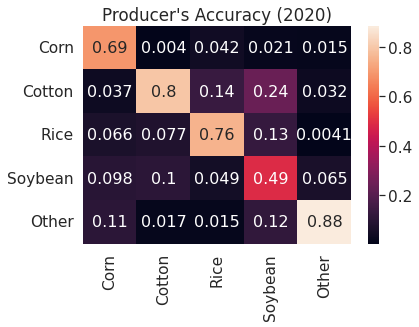

In [ ]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},
xticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other'],
yticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other']) # font size
plt.title("Producer's Accuracy (2020)")
plt.savefig("producer2020.png", dpi=300)
plt.show()

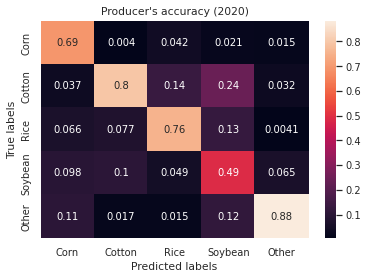

In [ ]:
ax = plt.subplot()
sns.set()

sns.set(font_scale=0.9) # for label size
sns.heatmap(df_cm, annot=True, ax = ax, annot_kws={"size": 10},
 xticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other'],
 yticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other']) # font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
plt.title("Producer's accuracy (2020)")
plt.savefig("producer2020new.png", dpi=300, transparent = True)
plt.show()

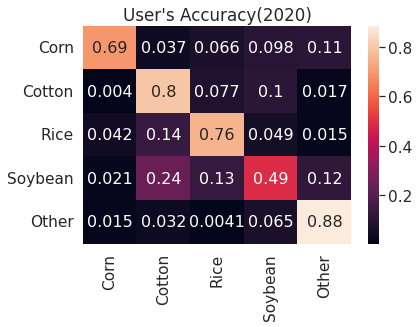

In [ ]:
cm= a.astype('float') / a.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm, range(5), range(5))

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},
xticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other'],
yticklabels=['Corn', 'Cotton', 'Rice','Soybean', 'Other']) # font size
plt.title("User's Accuracy(2020)")
plt.savefig("user2020.png", dpi=300)
plt.show()

In [ ]:
OA=sum(np.diag(a))/len(TestY2020)
OA

0.723157009288277

#Write tiff for Classification 2019

In [ ]:
data_gt2019=gdal.Open("gt_test_1.tif")
dataArr_gt2019=np.stack(data_gt2019.ReadAsArray())

from numpy import genfromtxt
from osgeo import gdal_array as gdarr
TestY2019predict=genfromtxt("ypred2019new.csv",delimiter=",")



In [ ]:
TestY2019predict=TestY2019predict[1:,1]

In [ ]:
TestY2019predict[1:,1]

array([4., 5., 5., ..., 4., 4., 4.])

In [ ]:
ypredict2019=np.reshape(TestY2019predict,dataArr_gt2019.shape)

xoff = 0
yoff = 0
win_xsize = dataArr_gt2019.shape[0]
win_ysize = dataArr_gt2019.shape[1]


# create raster file
dst_ds = gdal.GetDriverByName('GTiff').Create('SVM2019.tif', win_ysize, win_xsize, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(data_gt2019.GetGeoTransform())    # specify coords
#srs = osr.SpatialReference(data_gt.GetProjectionRef)            # establish encoding
#srs.ImportFromEPSG(3857)                # WGS84 lat/long
dst_ds.SetProjection(data_gt2019.GetProjection()) # export coords to file
dst_ds.GetRasterBand(1).WriteArray(ypredict2019)   # write r-band to the raster
   # write b-band to the raster
dst_ds.FlushCache()                     # write to disk
dst_ds = None      

In [ ]:
TestY2019predict

array([nan, nan, nan, ..., nan, nan, nan])